### Load tensorflow

In [0]:
import tensorflow as tf

### Collect Data

In [0]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [0]:
trainX.shape

(60000, 28, 28)

### Convert Output label to multiple values

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [0]:
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Add layers for Classification

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [0]:
#Train the model
history = model.fit(trainX,trainY,
                    validation_data=(testX,testY),
                    epochs=10,
                    batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1518 - accuracy: 0.9523 - val_loss: 0.0460 - val_accuracy: 0.9848
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0327 - val_accuracy: 0.9887
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0366 - val_accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0359 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0369 - val_accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0308 - val_accuracy: 0.9907

### Exploring History

In [0]:
history

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
history.history

{'accuracy': [0.9522833228111267,
  0.9847999811172485,
  0.9905166625976562,
  0.9922666549682617,
  0.9934666752815247,
  0.9950166940689087,
  0.9954833388328552,
  0.9959999918937683,
  0.9964500069618225,
  0.996749997138977],
 'loss': [0.15182524919509888,
  0.048629675060510635,
  0.03097112663090229,
  0.024036530405282974,
  0.020353609696030617,
  0.015380442142486572,
  0.013777109794318676,
  0.010618011467158794,
  0.00991800706833601,
  0.009224372915923595],
 'val_accuracy': [0.9847999811172485,
  0.9886999726295471,
  0.9898999929428101,
  0.9890999794006348,
  0.9883000254631042,
  0.9911999702453613,
  0.9907000064849854,
  0.9914000034332275,
  0.9919000267982483,
  0.9904999732971191],
 'val_loss': [0.04600592330098152,
  0.03270678222179413,
  0.03655647858977318,
  0.03594939783215523,
  0.03690088912844658,
  0.03199516609311104,
  0.030801471322774887,
  0.029643554240465164,
  0.03289199620485306,
  0.03605598211288452]}

### Plotting history

In [0]:
import matplotlib.pyplot as plt

Accuracy

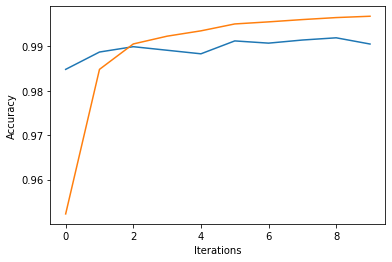

In [0]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

Loss

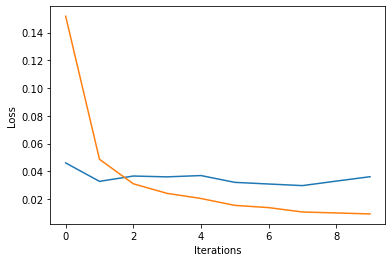

In [0]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()